# Problem
Create an edge detector using convolutions.

# Setup
Import libraries and load the image.

In [33]:
from PIL import Image
import math
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

Shape: (500, 500) | dtype: uint8
Hella hawt


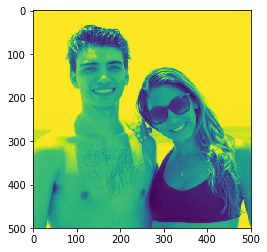

In [34]:
original = np.asarray(Image.open('sam.jpg').convert('L'))
print('Shape:', original.shape, '| dtype:', original.dtype)
imshow(original)
print('Hella hawt')

Modify the functionfrom our blurring project earlier so that it accepts in a function

In [8]:
def apply_transformation(tensor, transform, size, step):
    """
    Applies a transformation to each subtensor throughout the image based on the given transformation
    
    --Parameters--
    tensor: a numpy tensor with dimension greater than or equal to 2 (3d, 4d, 5d...) 
    transform: the transformation function to apply on the subtensor
    size: size of the convolution square
    step: 
    """
    w = tensor.shape[0]
    h = tensor.shape[1]
    margin = int(size/2)
    transformed = np.zeros_like(tensor)
    for x in range(0, w, step):
        for y in range(0, h, step):
            # define the reg3ion to extract the submatrix from
            xmin = x-margin if x-margin >= 0 else 0
            xmax = x+margin+1 if x+margin+1 < w else w
            ymin = y-margin if y-margin >= 0 else 0
            ymax = y+margin+1 if y+margin+1 < h else h
            # apply the transformation to the submatrix
            transformed[xmin:xmax, ymin:ymax] = transform(tensor[xmin:xmax, ymin:ymax])
    return transformed

Define a sobel edge detector function using sobel kernels. Found sobel here: http://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm

In [36]:
# requires step size 1? size 3
def sobel_edge(submatrix):
    if submatrix.shape != (3,3):
        return 0
    gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    gy = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])
    return math.sqrt(np.sum(np.multiply(gx, submatrix))**2 + np.sum(np.multiply(gy, submatrix))**2)

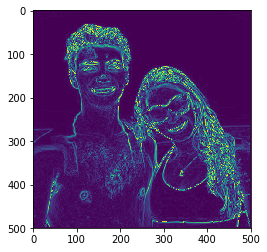

In [37]:
transformed = apply_transformation(original, sobel_edge, 3, 1)
imshow(transformed)

In [28]:
# def vertical_edge_detector(subtensor):
#     """
#     Draws a vertical edge straight down the middle
#     """
#     mask = np.zeros_like(subtensor) # make a numpy tensor similar to subtensor but with zeros
# #     print(mask)
#     width = mask.shape[0]
#     middle_x = int(width/2)
#     mask[middle_x,:,:] = 1 # set a vertical line of 1's down the middle
# #     print(mask)
    
#     return np.multiply(mask, subtensor)
# vertical_edge_detector(np.ones((3,3,3)) * 2)

In [27]:
# transformed = apply_transformation(original, vertical_edge_detector, 5, 5)
# imshow(transformed)